# **Extra-credit: in-class assignment**

In [10]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


In [11]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")  
content = result.content
soup = BeautifulSoup(content, 'html.parser')

In [12]:
tables = soup.find_all('table')
table = tables[0]
df = pd.DataFrame(columns=['Country_Name', 'Area_sqkm', 'Area_sqmi', 'Population'])


In [13]:

for row in table.tbody.find_all('tr'):    
    columns = row.find_all('td')
    Country_Name = row.find_all('th')

    if(columns != []):
        Country_Name = Country_Name[0].text.strip()
        Area_sqkm = float((columns[1].text.strip()).replace(',', ''))
        Area_sqmi = float((columns[2].text.strip()).replace(',', ''))
        population = float((columns[0].text.strip()).replace(',', ''))
        df = df.append({'Country_Name': Country_Name,  'Area_sqkm': Area_sqkm, 'Area_sqmi': Area_sqmi, 'Population': population}, ignore_index=True)

In [14]:
print(df)


                        Country_Name  Area_sqkm  Area_sqmi  Population
0                      Macau (China)       33.0      13.00    686607.0
1                             Monaco        2.0       1.00     36686.0
2                          Singapore      716.0     276.00   5453600.0
3                  Hong Kong (China)     1104.0     426.00   7494578.0
4                    Gibraltar (BOT)        6.0       2.00     32669.0
..                               ...        ...        ...         ...
245                         Mongolia  1564116.0  603905.00   3347782.0
246         Western Sahara [note 14]   266000.0  102703.00    565581.0
247           Falkland Islands (BOT)    12173.0    4700.00      3764.0
248  Svalbard and Jan Mayen (Norway)    62422.0   24101.13      2939.0
249              Greenland (Denmark)  2166086.0  836325.80     56243.0

[250 rows x 4 columns]


In [15]:
print(df.describe(include=[np.number]))


          Area_sqkm     Area_sqmi    Population
count  2.500000e+02  2.500000e+02  2.500000e+02
mean   1.675991e+06  6.471002e+05  9.555997e+07
std    1.274144e+07  4.919469e+06  7.225530e+08
min    0.000000e+00  0.000000e+00  4.700000e+01
25%    1.611250e+03  6.220000e+02  3.167948e+05
50%    6.545500e+04  2.527200e+04  5.131560e+06
75%    3.875502e+05  1.496330e+05  2.096571e+07
max    1.489400e+08  5.750573e+07  7.990310e+09


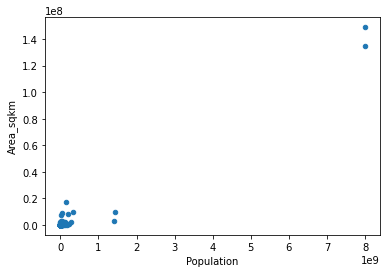

In [16]:
df.plot.scatter(x = "Population", y = "Area_sqkm")